In [41]:
# This data set describes the amount of wildlife trade that occurred in the years 2016-17 
# as recorded by CITES. It should be noted that countries participating in CITES are asked to 
# self report. The data is then comprised of discovered events occuring within a country 
# whom then reports accurate details by its own honor. 
# In light of this, it should be noted that there is a clear argument against the accuracy of
# the information presented. 
# However, this document provides the best information at present to aid in analyzing trade
# activity that puts entire species at risk. 

In [42]:
#loading in the data
import pandas as pd
import numpy as np 
import sys
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')

cites = pd.read_csv("/Users/joshhawkins/Desktop/Code Post-China/CITES ILLEGAL WILDLIFE TRADE 2016-2017/comptab_2018-01-29 16_00_comma_separated.csv",
                    
)
%matplotlib inline

In [43]:
# testing the data set
# Looks good so far, although origin, quantities, and units are frequently NaN.
# Unfortunately, the drastic lack of consistency within the quantity data has 
# left me with the decision to remove it from my analysis.
cites

,Year,App.,Taxon,Class,Order,Family,Genus,Importer,Exporter,Origin,Importer reported quantity,Exporter reported quantity,Term,Unit,Purpose,Source
0,2016,I,Aquila heliaca,Aves,Falconiformes,Accipitridae,Aquila,TR,NL,CZ,NaN,1.0,bodies,NaN,T,C
1,2016,I,Aquila heliaca,Aves,Falconiformes,Accipitridae,Aquila,XV,RS,RS,NaN,1.0,bodies,NaN,Q,O
2,2016,I,Haliaeetus albicilla,Aves,Falconiformes,Accipitridae,Haliaeetus,BE,NO,NaN,NaN,43.0,feathers,NaN,S,W
3,2016,I,Haliaeetus albicilla,Aves,Falconiformes,Accipitridae,Haliaeetus,BE,NO,NaN,NaN,43.0,specimens,NaN,S,W
4,2016,I,Haliaeetus albicilla,Aves,Falconiformes,Accipitridae,Haliaeetus,DK,IS,NaN,700.0,NaN,specimens,NaN,S,W
5,2016,I,Haliaeetus albicilla,Aves,Falconiformes,Accipitridae,Haliaeetus,XV,RS,RS,NaN,1.0,bodies,NaN,Q,O
6,2016,I,Harpia harpyja,Aves,Falconiformes,Accipitridae,Harpia,BR,FR,NaN,NaN,12.0,feathers,NaN,S,C
7,2016,I,Harpia harpyja,Aves,Falconiformes,Accipitridae,Harpia,BR,FR,NaN,NaN,4.0,feathers,NaN,S,U
8,2016,I,Harpia harpyja,Aves,Falconiformes,Accipitridae,Harpia,BR,FR,NaN,NaN,2.0,feathers,NaN,S,W
9,2016,I,Acipenser brevirostrum,Actinopteri,Acipenseriformes,Acipenseridae,Acipenser,CH,DE,NaN,NaN,4.0,live,NaN,T,C


In [44]:
cites["Year"].value_counts()

2016    67007
2017      154
Name: Year, dtype: int64

In [45]:
#Because the 2017 information is so sparse, it will be cut so as not to skew results
cites = cites[cites['Year'] == 2016]

In [46]:
#The lack of complete country names and the unpredictability of labeling make full name conversion necessary

In [47]:
#In observing the top 15 importers, I notice that not only are country acronyms potentially confusing, 
#but Hong Kong and Macau are also listed as separate from China
#CA and HK must be combined for China data to be accurate


#RENAMING COUNTRY ACRONYMS
cites = cites.replace(["MO","CN","HK"],"China")
cites = cites.replace({'US':"United States",
               'CA':"Canada",
               'JP':"Japan",
               'DE':"Germany",
               'FR':"France",
               'CH':"Switzerland",
               'SG':"Singapore",
               'AE':"United Arab Emarites",
               'KR':"Republic of Korea (SK)",
               'GB':"United Kingdom",
               'IT':"Italy",
               'TW':"Taiwan",
               'TR':"Turkery",
               'NL':"Netherlands",
               'ID':"Indonesia",
               'IT':"Italy",
               'EC':"Ecuador",
               'TH':"Thailand",
               'AU':"Australia",
               'ZA':"South Africa",
               'MY':"Malaysia",
               'PE':"Peru",
               'XX':"UNKNOWN",
               'VN':"Vietnam",
               'ZW':"Zimbabwe",
               'AR':"Argentina",
               'CO':"Colombia",
               'BO':"Bolivia",
               'LA':"Lao",
               'KP':"DPRK (NK)",
               'MM':"Myanmar",
               'NO':"Norway",
               'RS':"Serbia",
               'QA': "Qatar",
               'KW': "Kuwait",
               'ES': "Spain",
               'BE': "Belgium",
               'DK': "Denmark",
               'CZ': "Czech Republic",
               'BH': "Bahrain",
               'BR': "Brazil",
               'PH': "Phillipines"
              })


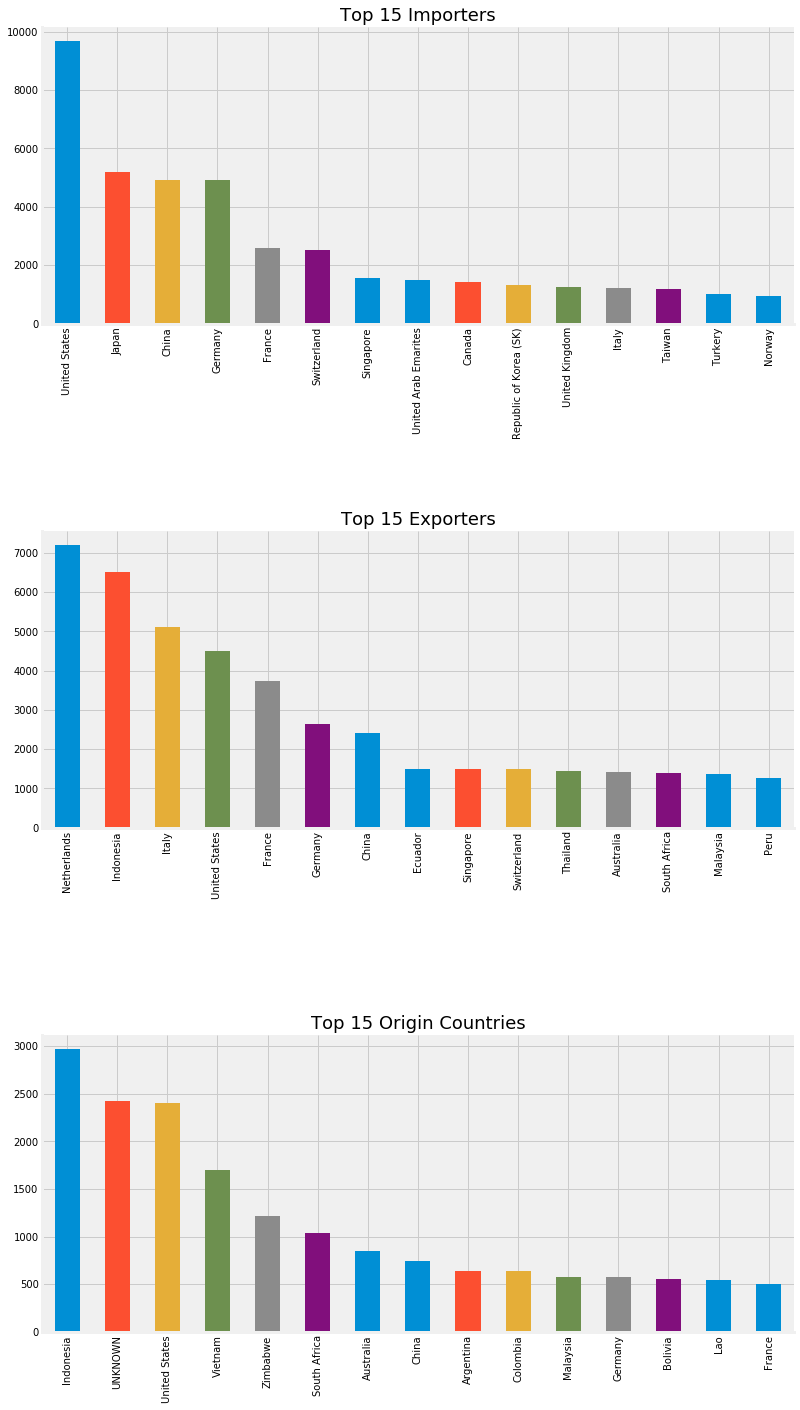

In [48]:
#Let's plot Importers, Exporters, and Source as a test
fig, plot = plt.subplots(3, 1, figsize=(12, 24))

cites['Importer'].value_counts().head(15).plot.bar(
    ax=plot[0]
)
plot[0].set_title("Top 15 Importers", fontsize=18)


cites['Exporter'].value_counts().head(15).plot.bar(
    ax=plot[1]
)
plot[1].set_title("Top 15 Exporters", fontsize=18)


cites['Origin'].value_counts().head(15).plot.bar(
    ax=plot[2],
)
plot[2].set_title("Top 15 Origin Countries", fontsize=18)

plt.subplots_adjust(hspace=.7)
sns.despine()

In [49]:
#PURPOSE EXTENDED

cites['Purpose'] = cites['Purpose'].replace({
                'B':"Bred in Captivity",
                'E':"Educational",
                'G':"Botannical Garden",
                'H':"Hunting Trophy",
                'L':"Law Enforcement",
                'M':"Medical/Research",
                'N':"Reintroduction to the Wild",
                'P':"Personal",
                'Q':"Circus or Exhibition",
                'S':"Scientific",
                'T':"Commercial",
                'Z':"Zoo"
})

In [50]:
#Source Extended. Fortunately, no single letters are re-used
#Values A, B, and C are in accordance with standing resolutions and will therefore be counted as "In Accordance"

cites['Source'] = cites['Source'].replace({
                'A':"In Accordance",
                'C':"In Accordance",
                'D':"In Accordance",
                'F':"Bred in Captivity",
                'I':"Confiscated or Seized",
                'O':"Pre-Convention Specimens",
                'R':"Ranched Specimens",
                'U':"UNKNOWN",
                'W':"Wild",
                'X':"Non-State Waters"
    
})

In [51]:
#ORGANIZING APPENDIXES
#The appendix the species belongs to. 
#Appendix I species are the most protected, and Appendix III species are the least.

cites['App.'] = cites['App.'].replace({
                'I':"Most Protected",
                'II':"Moderately Protected",
                'III':"Least Protected"
})


In [52]:
#The information in the dataframe is already questionable because participating countries self report. 
#See DPRK reporting 0 imports below.

KP = cites[cites['Importer'] == 'KP']
KP["Importer"].value_counts()

Series([], Name: Importer, dtype: int64)

In [53]:
#In an attempt to get a more accurate picture of the data, I will reduce the data to 
#'Commercial' in the purpose column and 'Most Protected' in the Appendix column
#I have made the choice to not take into account the quantity of 
#trade in favor of instances. The quantity variable is too inconsistent and often a null value.
#In many cases where a quantity value is given, the unit column holds a null value.
#Not taking the quantity into account hinders the accurracy of the analysis, however, including 
#incomplete data would hinder the analysis to a greater degree

cites = cites[cites['App.'] == 'Most Protected']

cites = cites[cites['Purpose'] == 'Commercial']



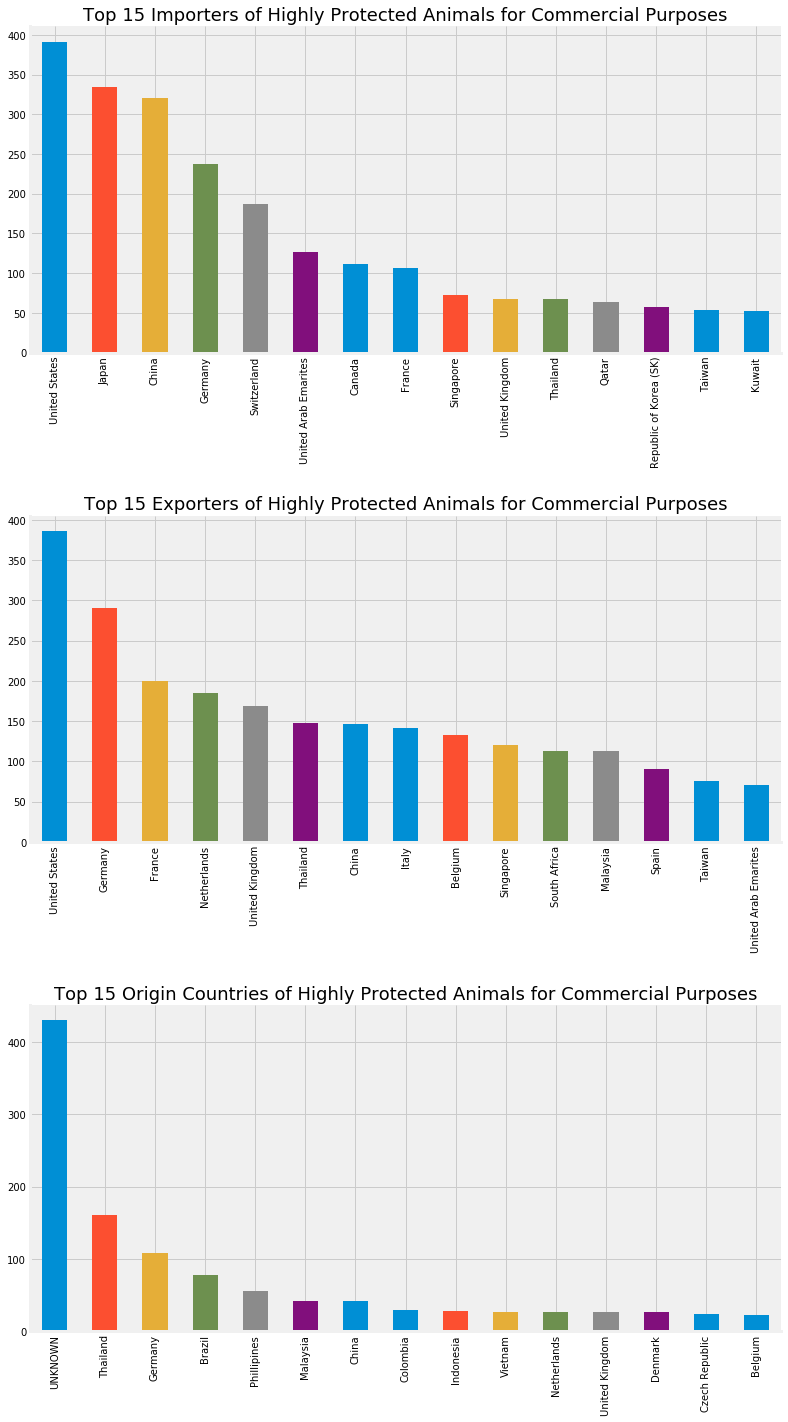

In [54]:
fig, plot = plt.subplots(3, 1, figsize=(12, 24))

cites['Importer'].value_counts().head(15).plot.bar(
    ax=plot[0],
)
plot[0].set_title("Top 15 Importers of Highly Protected Animals for Commercial Purposes", fontsize=18)


cites['Exporter'].value_counts().head(15).plot.bar(
    ax=plot[1]
)
plot[1].set_title("Top 15 Exporters of Highly Protected Animals for Commercial Purposes", fontsize=18)


cites['Origin'].value_counts().head(15).plot.bar(
    ax=plot[2]
)
plot[2].set_title("Top 15 Origin Countries of Highly Protected Animals for Commercial Purposes", fontsize=18)

plt.subplots_adjust(hspace=.5)

sns.despine()

Text(0.5,1,'Most Imported Animal Classes per Country')

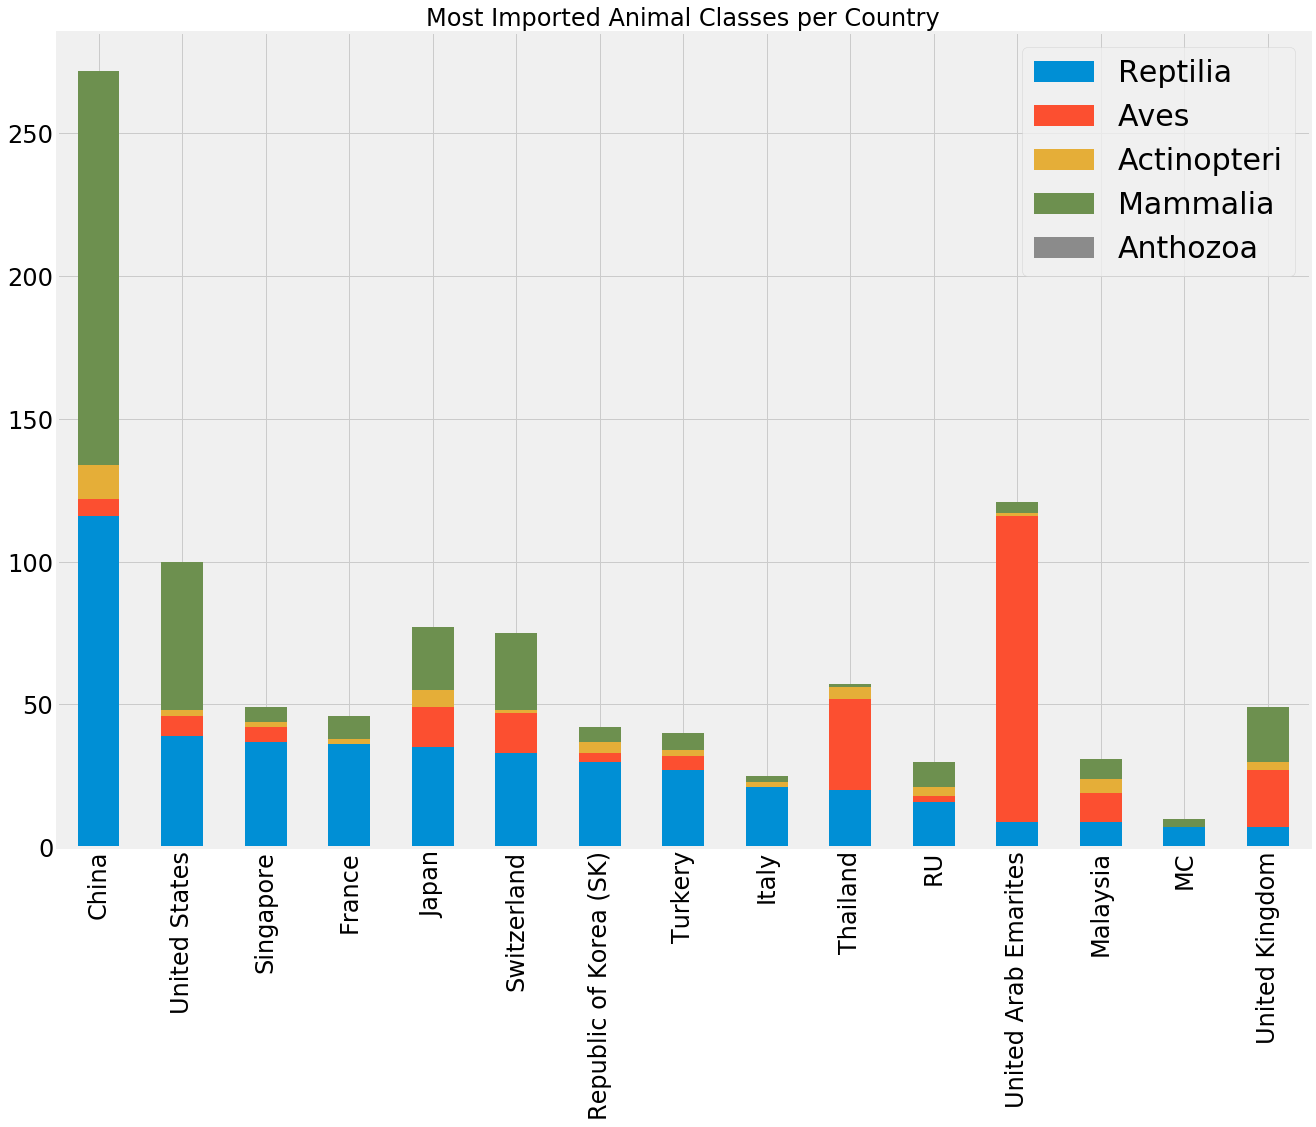

In [55]:
#Animal Families exploited by each market. It is assumed that null values skew the total number data, but it is helpful
#to see the make up of each country.
#The disparity between the United States in this map and previous plots is likey due to trade of plants not included
#in this plot
classes = ['Reptilia', 'Aves', 'Actinopteri', 'Mammalia', 'Anthozoa']
stacked = pd.DataFrame()
for i in classes:
    stacked[i] = cites['Importer'].loc[cites['Class']==i].value_counts()
stacked.head(15).plot.bar(figsize=(20,15), fontsize=24, stacked=True)

plt.legend(fontsize=30)
plt.title('Most Imported Animal Classes per Country', fontsize=24)

Text(0.5,1,'Most Exported Animal Classes per Country')

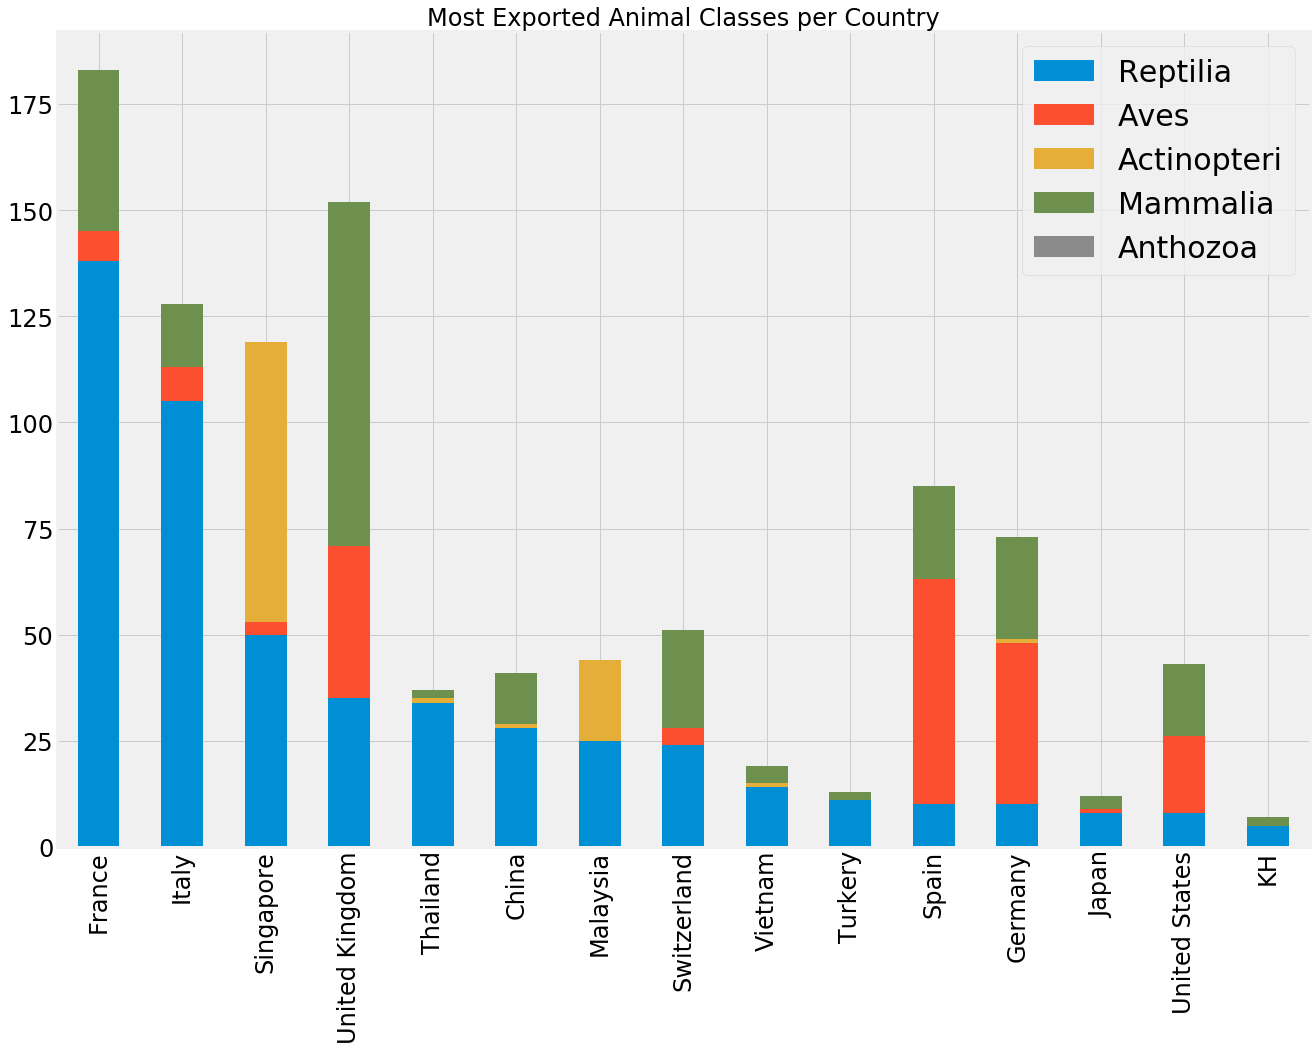

In [56]:
#Animal Families exploited by each market. Again, it is assumed that null values skew the total number data, but it is helpful
#to see the make up of each country.
#The disparity between the United States and others in this map and previous plots is likey due to trade of plants not included
#in this plot
classes = ['Reptilia', 'Aves', 'Actinopteri', 'Mammalia', 'Anthozoa']
stacked = pd.DataFrame()
for i in classes:
    stacked[i] = cites['Exporter'].loc[cites['Class']==i].value_counts()
stacked.head(15).plot.bar(figsize=(20,15), fontsize=24, stacked=True)

plt.legend(fontsize=30)
plt.title('Most Exported Animal Classes per Country', fontsize=24)

Text(0.5,1,'Top Importer Uses for Reocurring Countries')

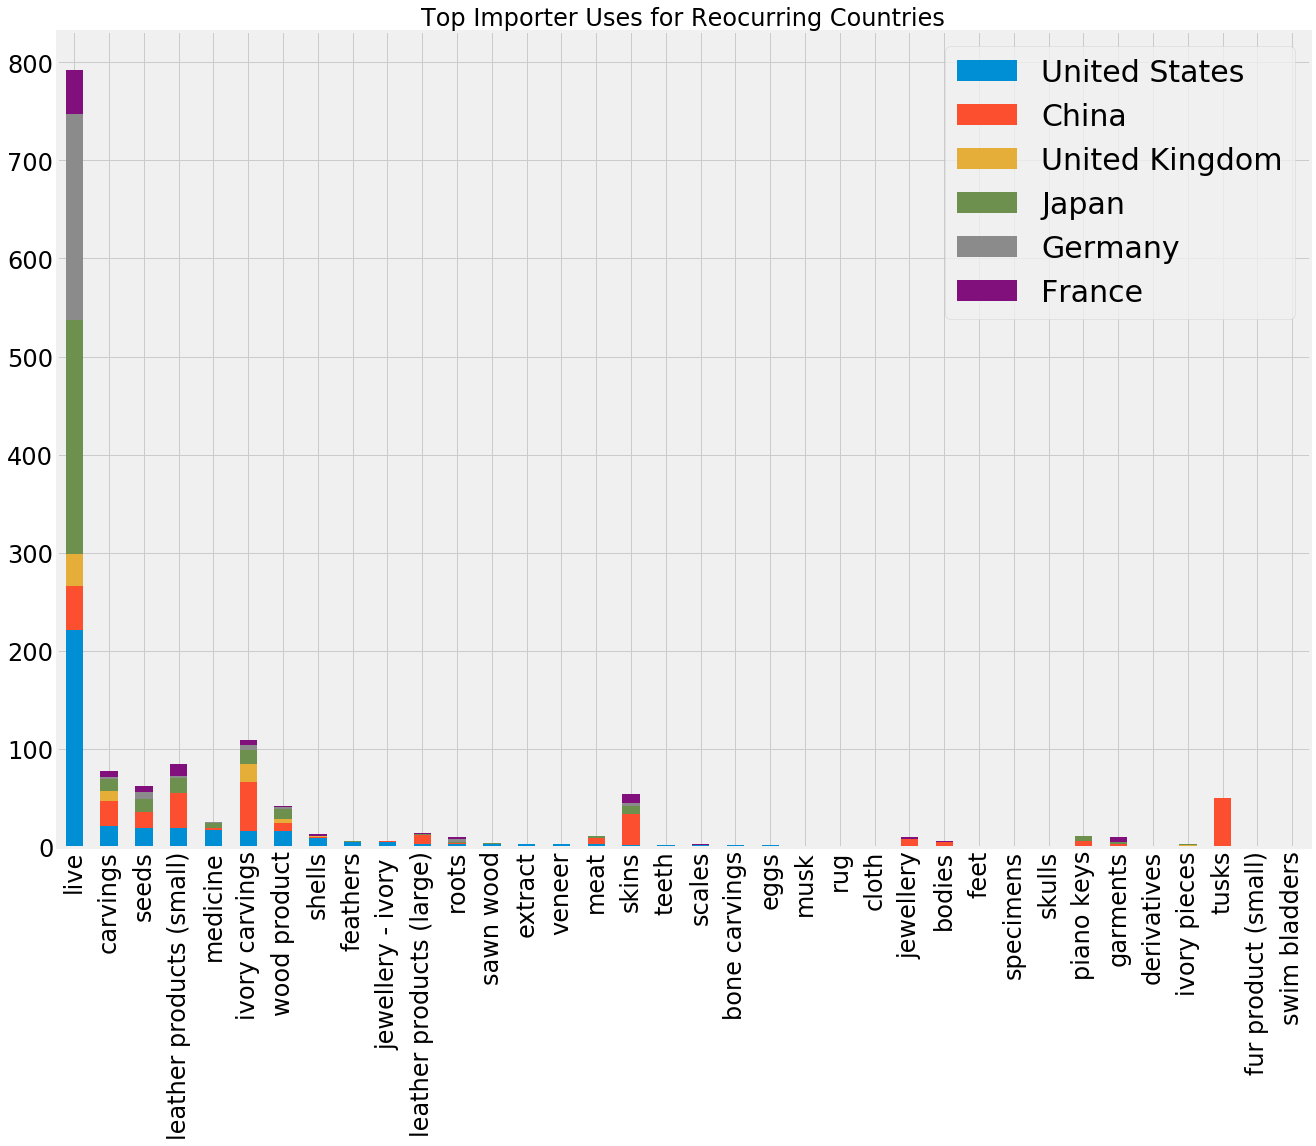

In [57]:
reoccurring_countries = ["United States", "China", "United Kingdom", "Japan", "Germany", "France"]
stack = pd.DataFrame()
for i in reoccurring_countries:
    stack[i] = cites["Term"].loc[cites['Importer']==i].value_counts()
stack.plot.bar(figsize=(20,15), fontsize=24, stacked=True)

plt.legend(fontsize=30)
plt.title('Top Importer Uses for Reocurring Countries', fontsize=24)

Text(0.5,1,'Top Exporter Uses for Reocurring Countries')

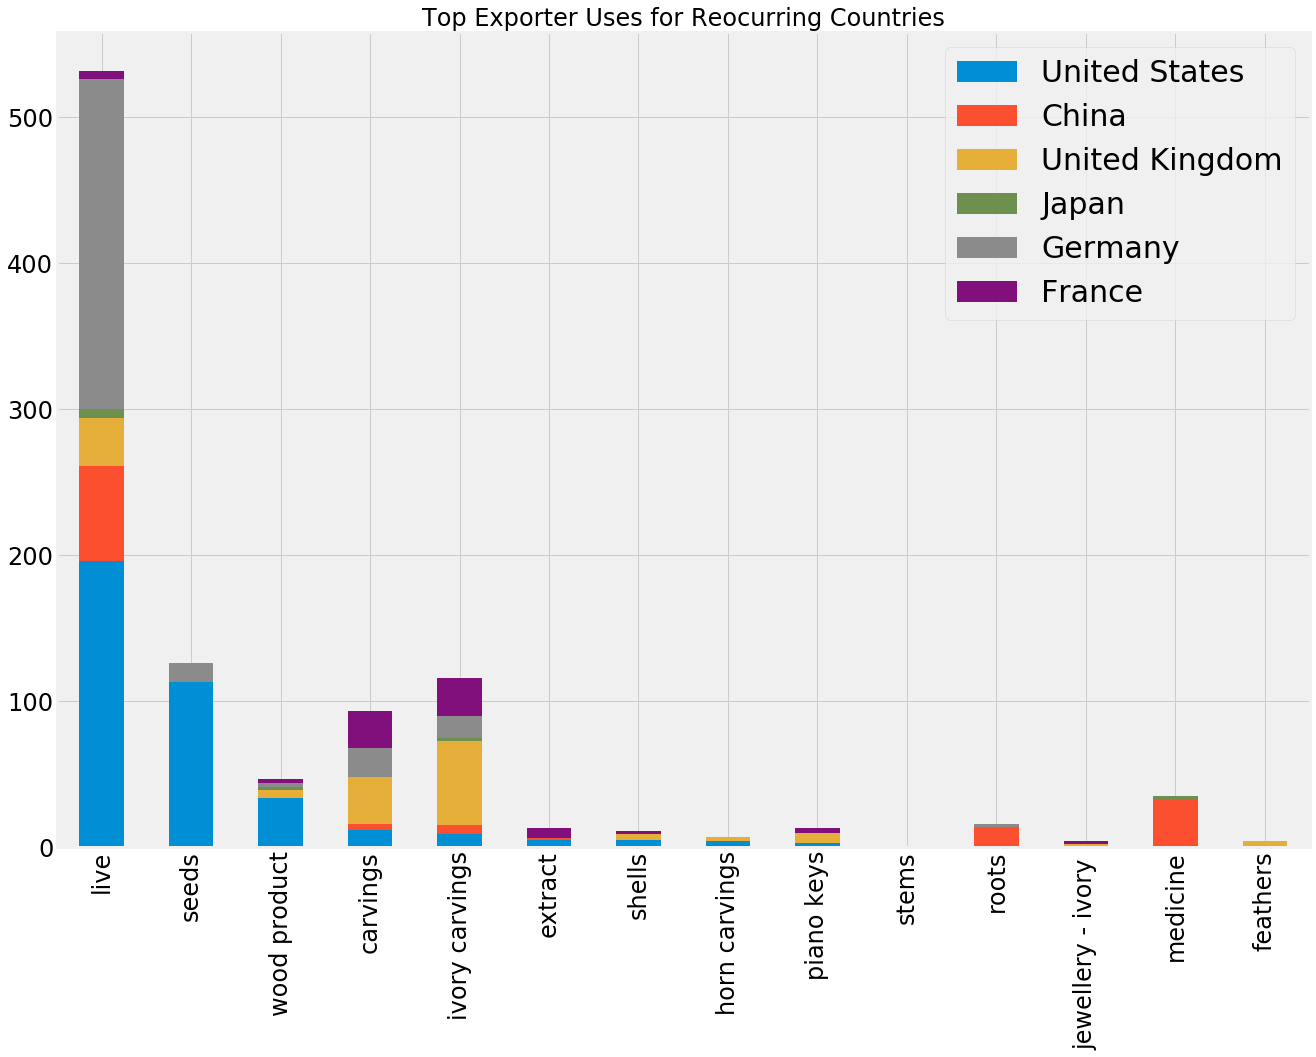

In [58]:
reoccurring_countries = ["United States", "China", "United Kingdom", "Japan", "Germany", "France"]
stack = pd.DataFrame()
for i in reoccurring_countries:
    stack[i] = cites["Term"].loc[cites['Exporter']==i].value_counts()
stack.plot.bar(figsize=(20,15), fontsize=24, stacked=True)

plt.legend(fontsize=30)
plt.title('Top Exporter Uses for Reocurring Countries', fontsize=24)

Text(0.5,1,'Top 15 Most Traded Highly Protected Species')

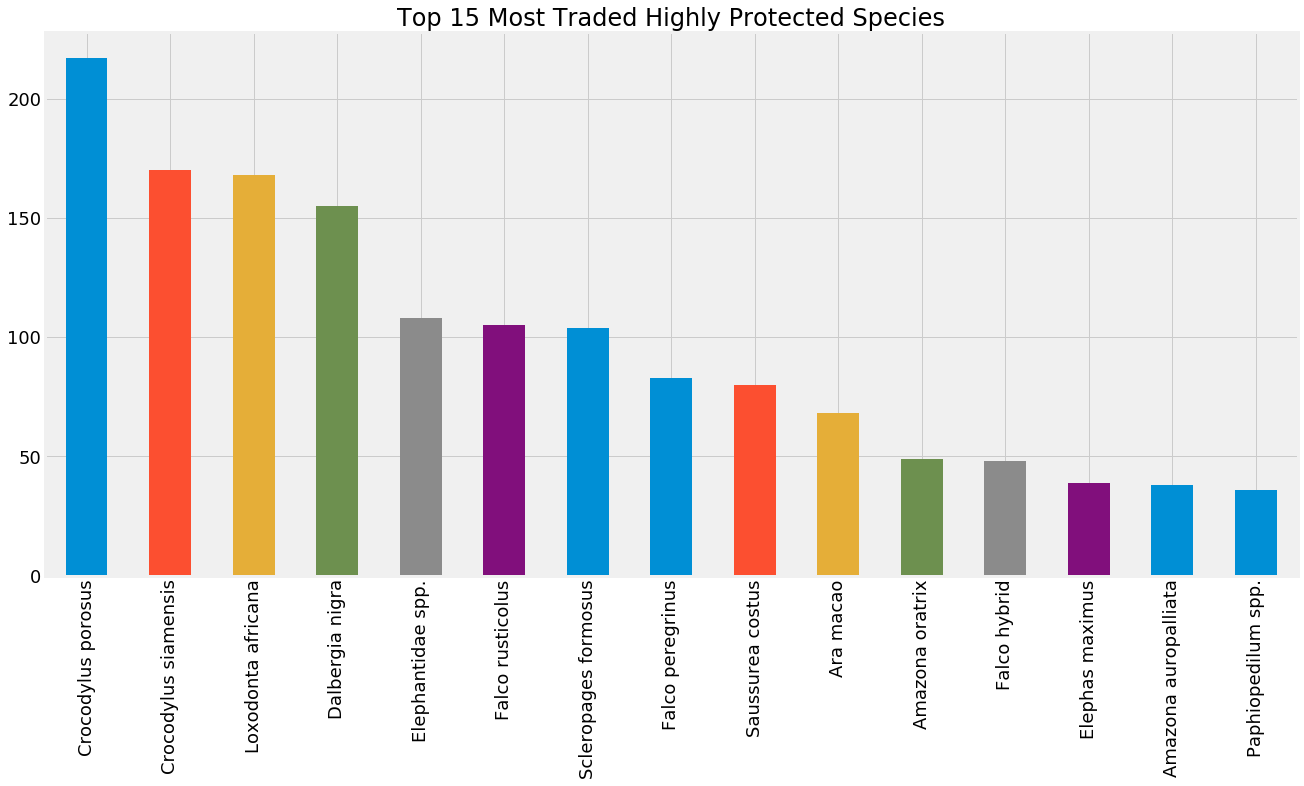

In [59]:
#TOP 15 Most Traded Highly Protected Species
plt.figure(figsize=(20,10))
cites["Taxon"].value_counts().head(15).plot.bar(fontsize=18)
plt.title("Top 15 Most Traded Highly Protected Species", fontsize=24)
#plt.xticks(rotation=0)


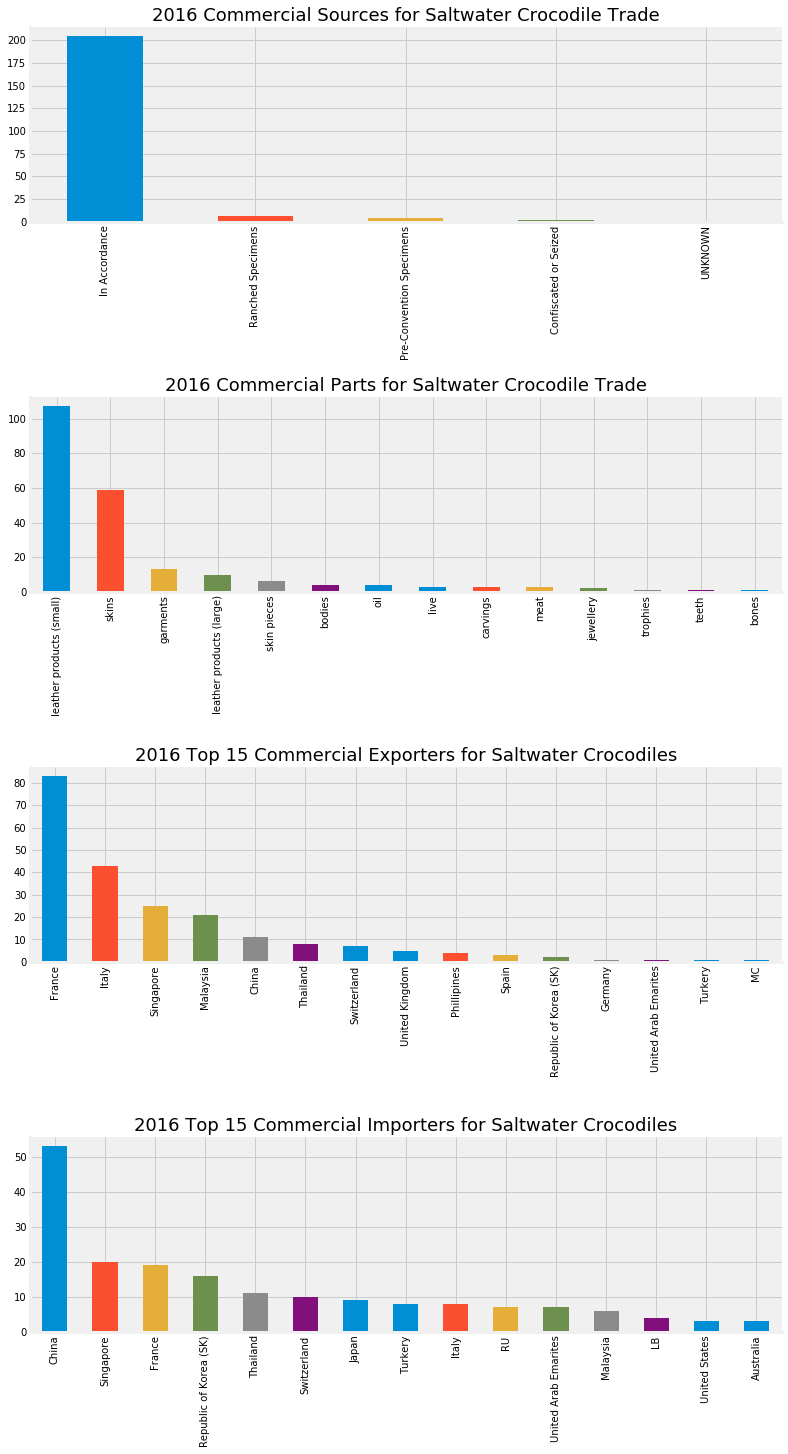

In [60]:
saltwater_crocodile = cites[cites['Taxon']=='Crocodylus porosus']

fig, plot = plt.subplots(4, 1, figsize=(12, 24))

saltwater_crocodile['Source'].value_counts().plot.bar(
    ax=plot[0]
)
plot[0].set_title("2016 Commercial Sources for Saltwater Crocodile Trade", fontsize=18)


saltwater_crocodile['Term'].value_counts().plot.bar(
    ax=plot[1]
)
plot[1].set_title("2016 Commercial Parts for Saltwater Crocodile Trade", fontsize=18)


saltwater_crocodile["Exporter"].value_counts().head(15).plot.bar(
    ax=plot[2]
)
plot[2].set_title("2016 Top 15 Commercial Exporters for Saltwater Crocodiles", fontsize=18)


saltwater_crocodile["Importer"].value_counts().head(15).plot.bar(
    ax=plot[3]
)
plot[3].set_title("2016 Top 15 Commercial Importers for Saltwater Crocodiles", fontsize=18)

plt.subplots_adjust(hspace=.9)

sns.despine()


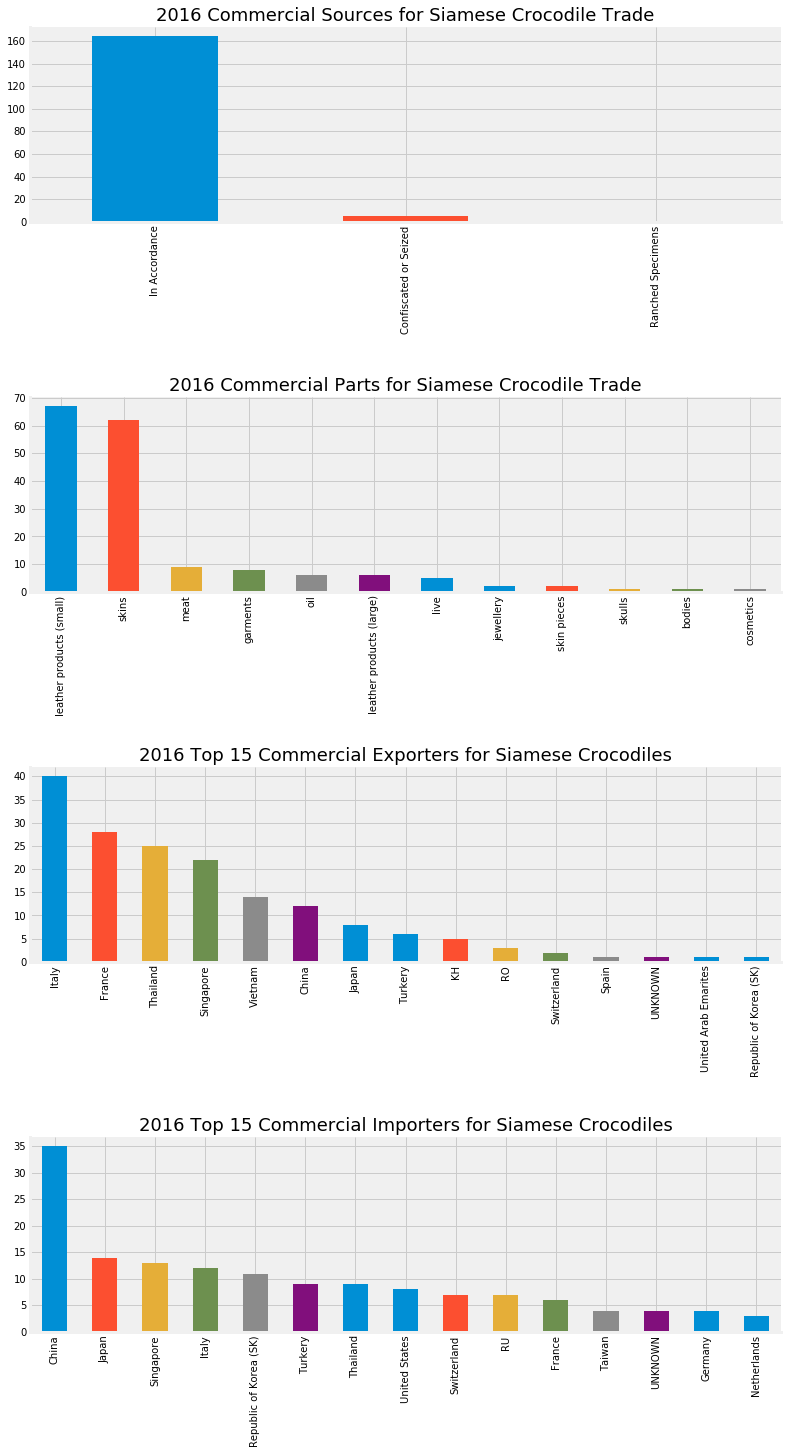

In [61]:
siamese_crocodile = cites[cites['Taxon']=='Crocodylus siamensis']

fig, plot = plt.subplots(4, 1, figsize=(12, 24))

siamese_crocodile['Source'].value_counts().plot.bar(
    ax=plot[0]
)
plot[0].set_title("2016 Commercial Sources for Siamese Crocodile Trade", fontsize=18)


siamese_crocodile['Term'].value_counts().plot.bar(
    ax=plot[1]
)
plot[1].set_title("2016 Commercial Parts for Siamese Crocodile Trade", fontsize=18)


siamese_crocodile["Exporter"].value_counts().head(15).plot.bar(
    ax=plot[2]
)
plot[2].set_title("2016 Top 15 Commercial Exporters for Siamese Crocodiles", fontsize=18)


siamese_crocodile["Importer"].value_counts().head(15).plot.bar(
    ax=plot[3]
)
plot[3].set_title("2016 Top 15 Commercial Importers for Siamese Crocodiles", fontsize=18)

plt.subplots_adjust(hspace=.9)

sns.despine()


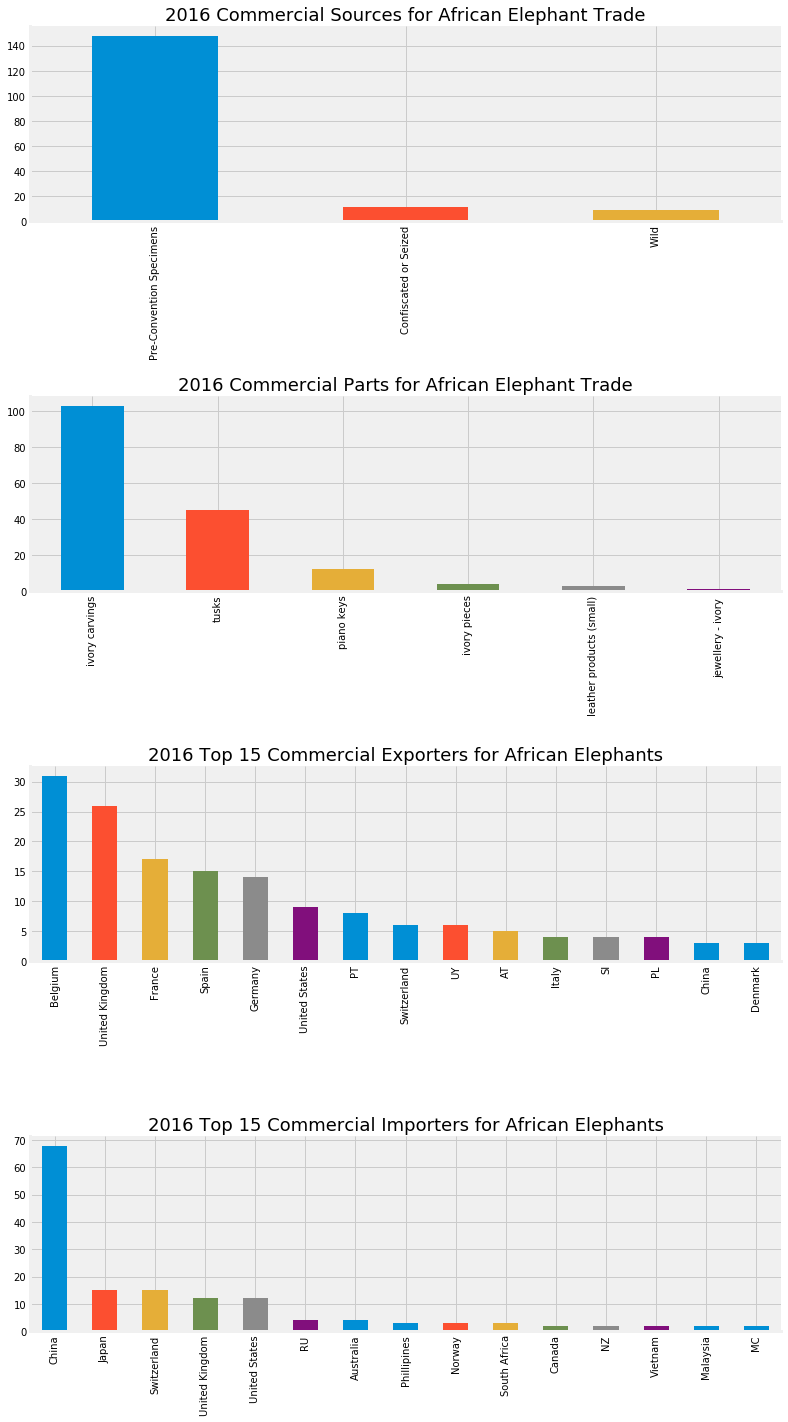

In [62]:
african_elephant = cites[cites['Taxon']=='Loxodonta africana']

fig, plot = plt.subplots(4, 1, figsize=(12, 24))

african_elephant['Source'].value_counts().plot.bar(
    ax=plot[0]
)
plot[0].set_title("2016 Commercial Sources for African Elephant Trade", fontsize=18)


african_elephant['Term'].value_counts().plot.bar(
    ax=plot[1]
)
plot[1].set_title("2016 Commercial Parts for African Elephant Trade", fontsize=18)


african_elephant["Exporter"].value_counts().head(15).plot.bar(
    ax=plot[2]
)
plot[2].set_title("2016 Top 15 Commercial Exporters for African Elephants", fontsize=18)


african_elephant["Importer"].value_counts().head(15).plot.bar(
    ax=plot[3]
)
plot[3].set_title("2016 Top 15 Commercial Importers for African Elephants", fontsize=18)

plt.subplots_adjust(hspace=.9)

sns.despine()


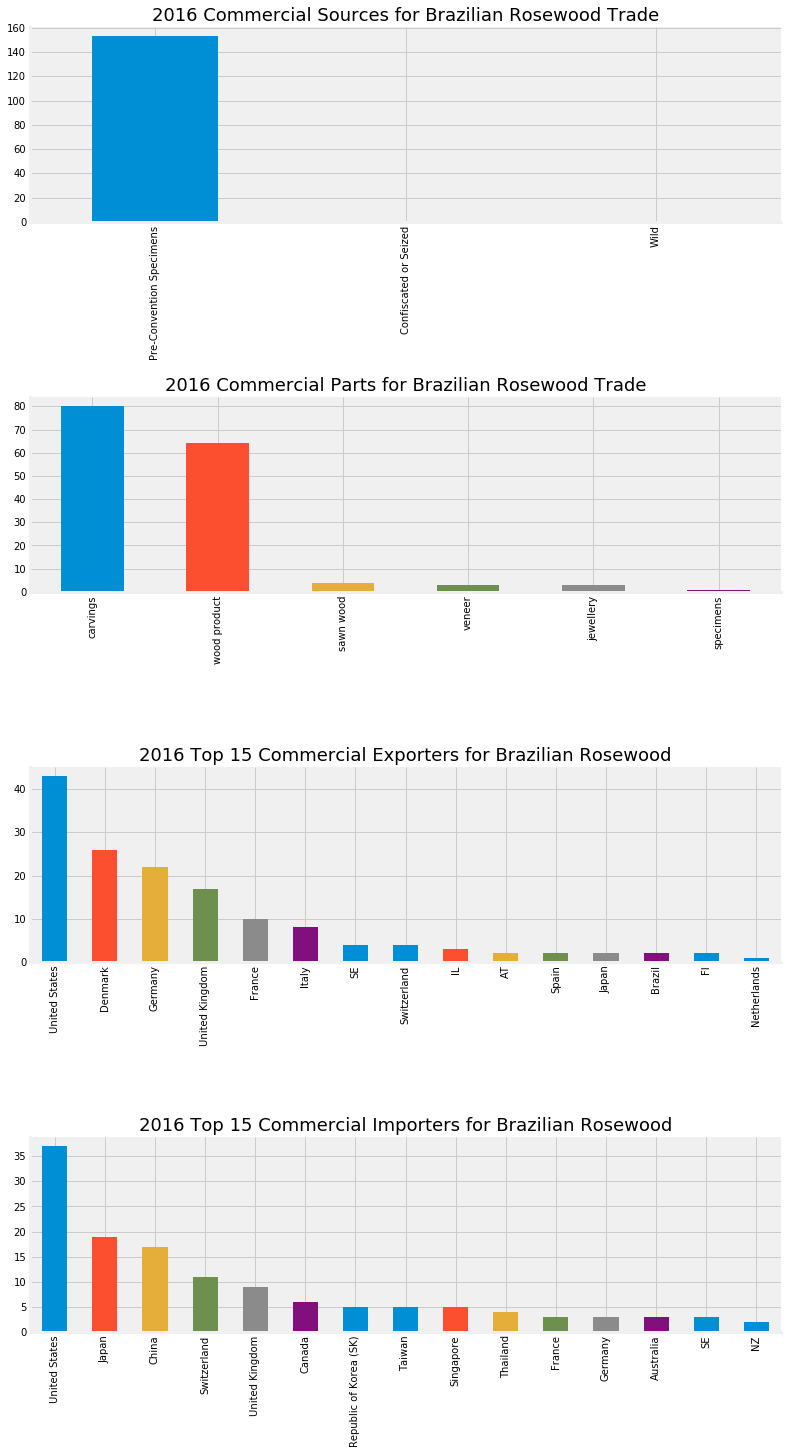

In [63]:
brazilian_rosewood = cites[cites['Taxon']=='Dalbergia nigra']

fig, plot = plt.subplots(4, 1, figsize=(12, 24))

brazilian_rosewood['Source'].value_counts().plot.bar(
    ax=plot[0]
)
plot[0].set_title("2016 Commercial Sources for Brazilian Rosewood Trade", fontsize=18)


brazilian_rosewood['Term'].value_counts().plot.bar(
    ax=plot[1]
)
plot[1].set_title("2016 Commercial Parts for Brazilian Rosewood Trade", fontsize=18)


brazilian_rosewood["Exporter"].value_counts().head(15).plot.bar(
    ax=plot[2]
)
plot[2].set_title("2016 Top 15 Commercial Exporters for Brazilian Rosewood", fontsize=18)


brazilian_rosewood["Importer"].value_counts().head(15).plot.bar(
    ax=plot[3]
)
plot[3].set_title("2016 Top 15 Commercial Importers for Brazilian Rosewood", fontsize=18)

plt.subplots_adjust(hspace=.9)

sns.despine()


In [64]:
#Out of curiosity I've decided to check the top occurring families to see what purposes they 
#are traded for
cites.Family.value_counts()

Orchidaceae          738
Crocodylidae         450
Elephantidae         315
Psittacidae          304
Falconidae           253
Cactaceae            202
Leguminosae          155
Zamiaceae            147
Osteoglossidae       104
Compositae            80
Cheloniidae           73
Felidae               36
Cacatuidae            31
Phasianidae           21
Rhinocerotidae        17
Euphorbiaceae         15
Lemuridae             15
Gruidae               15
Liliaceae             10
Physeteridae          10
Bovidae               10
Camelidae              9
Araucariaceae          9
Nepenthaceae           7
Cebidae                6
Sturnidae              6
Iguanidae              5
Ursidae                5
Testudinidae           4
Spheniscidae           4
Threskiornithidae      4
Fringillidae           4
Balaenopteridae        3
Hominidae              3
Anatidae               2
Struthionidae          2
Apocynaceae            2
Acipenseridae          1
Tapiridae              1
Cercopithecidae        1


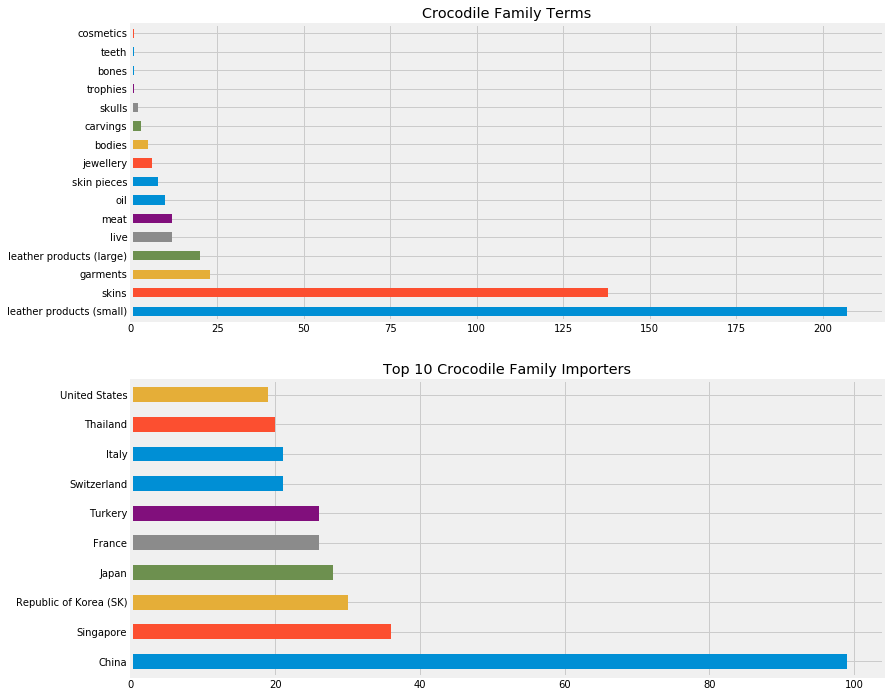

In [65]:
# The crocodile family is traded mostly for skin and leather products
# China is the largest consumer.
fig, plot = plt.subplots(2, 1, figsize=(12, 12))

cites["Term"].loc[cites["Family"]=="Crocodylidae"].value_counts().plot.barh(ax=plot[0], title="Crocodile Family Terms")
cites["Importer"].loc[cites["Family"]=="Crocodylidae"].value_counts().head(10).plot.barh(ax=plot[1], title="Top 10 Crocodile Family Importers")


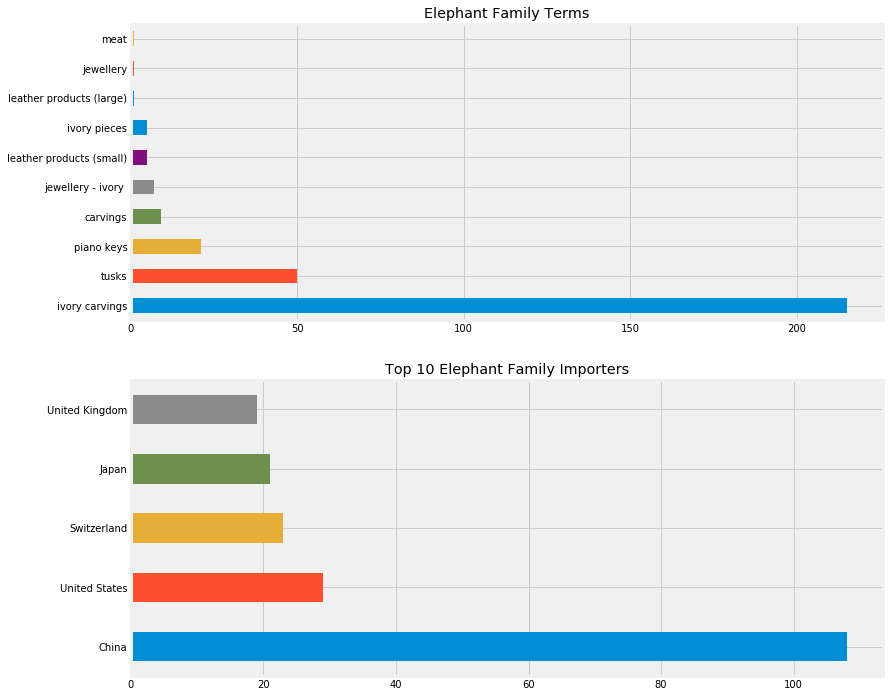

In [66]:
#The elephant family is by and large traded for ivory.
#The demand is largest in China twice over from the next largest importer.

fig, plot = plt.subplots(2, 1, figsize=(12, 12))

cites["Term"].loc[cites["Family"]=="Elephantidae"].value_counts().plot.barh(ax=plot[0], title="Elephant Family Terms")
cites["Importer"].loc[cites["Family"]=="Elephantidae"].value_counts().head().plot.barh(ax=plot[1], title="Top 10 Elephant Family Importers")



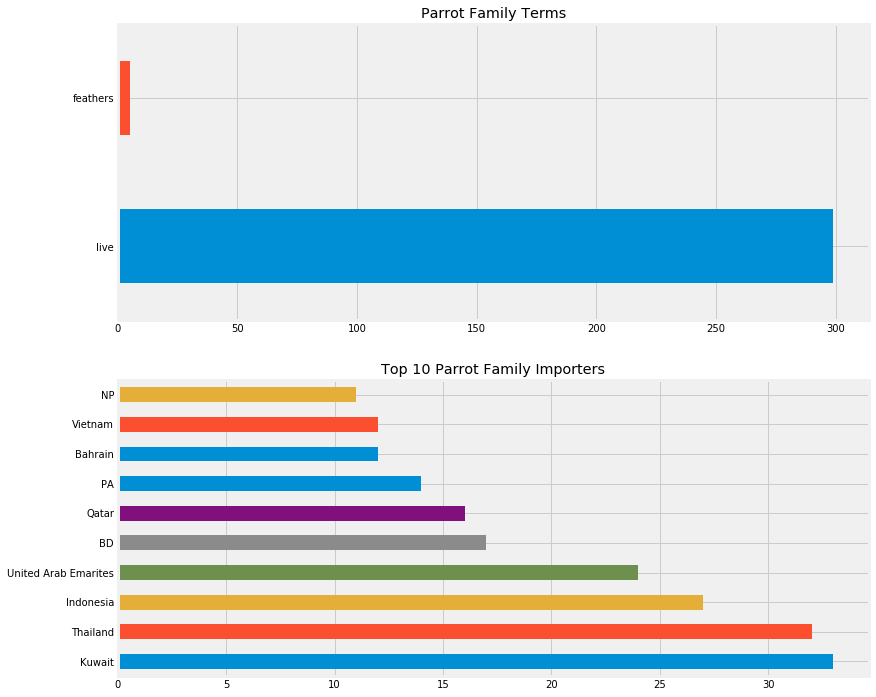

In [67]:
# It seems the demand for parrots lies in lives specimens. I would guess this is due to their
#popularity as pets.

fig, plot = plt.subplots(2, 1, figsize=(12, 12))

cites["Term"].loc[cites["Family"]=="Psittacidae"].value_counts().plot.barh(ax=plot[0], title="Parrot Family Terms")

cites["Importer"].loc[cites["Family"]=="Psittacidae"].value_counts().head(10).plot.barh(ax=plot[1], title="Top 10 Parrot Family Importers")




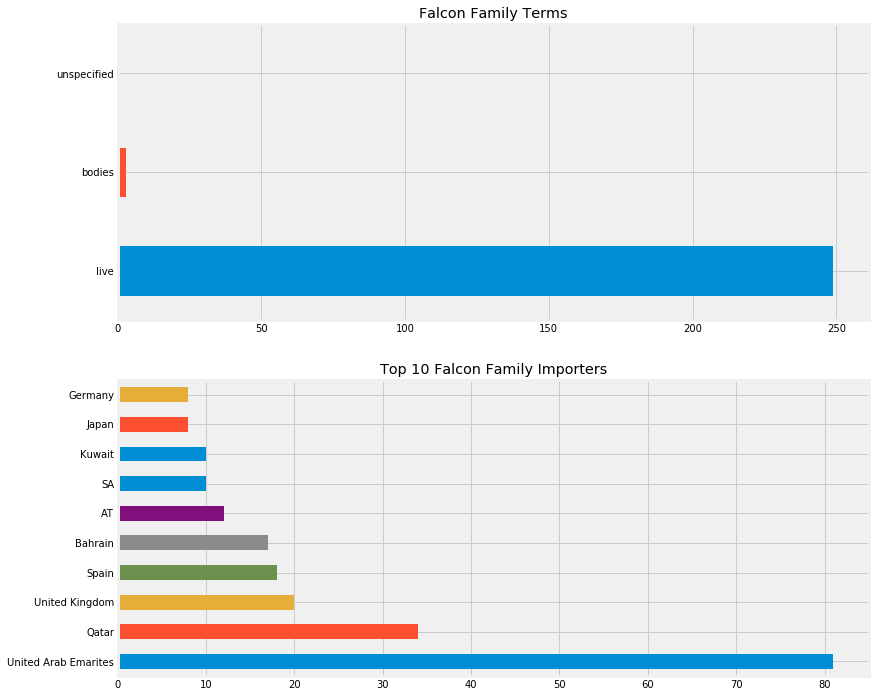

In [68]:
#The falcon family is mostly imported live likely for sport.
#The UAE is by far the largest exporter.

fig, plot = plt.subplots(2, 1, figsize=(12, 12))

cites["Term"].loc[cites["Family"]=="Falconidae"].value_counts().plot.barh(ax=plot[0], title="Falcon Family Terms")
cites["Importer"].loc[cites["Family"]=="Falconidae"].value_counts().head(10).plot.barh(ax=plot[1], title="Top 10 Falcon Family Importers")
